# Цель лабораторной работы:
Изучение линейных моделей, SVM и деревьев решений.

# Задание:

1. Выбрать набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости провести удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделить выборку на обучающую и тестовую.
4. Обучить следующие модели:
    1. одну из линейных моделей;
    2. SVM;
    3. дерево решений.
5. Оценить качество моделей с помощью двух подходящих для задачи метрик. Сравнить качество полученных моделей.


# 1. Импорт библиотек и данных

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [3]:
# Импорт датасета
mushrooms = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv', sep=",")

# 2. Характеристики датасета

Для выполнения лабораторной работы был выбран датасет **Mushroom Classification**, который содержит категориальные признаки. Поэтому следует решить задачу классификации: съедобен ли гриб или нет?

**Датасет содержит следующие признаки:**

    classes: целевой признак; съедобный=e, ядовитый=p)

    cap-shape: форма шляпки; bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: поверхность шляпки; fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: цвет шляпки; brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: пятна; bruises=t,no=f

    odor: запах; almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: крепление гимениальных пластинок; attached=a,descending=d,free=f,notched=n

    gill-spacing: расстояние между гимениальными пластинками; close=c,crowded=w,distant=d

    gill-size: размер гимениальных пластинок; broad=b,narrow=n

    gill-color: цвет гимениальных пластинок; black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: форма ножки; enlarging=e,tapering=t

    stalk-root: основание ножки; bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: поверхность ножки над кольцом; fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: поверхность ножки под кольцом; fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: цвет ножки над кольцом; brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: цвет ножки под кольцом; brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: тип велума; partial=p,universal=u

    veil-color: цвет велума; brown=n,orange=o,white=w,yellow=y

    ring-number: число колец; none=n,one=o,two=t

    ring-type: тип колец; cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: цвет спорового порошка; black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: популяция; abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: среда обитания; grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [4]:
# Первые 5 строк датасета
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Статистические характеристики признаков
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# Количество пропусков в данных
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Количество уникальных значений для каждого признака
mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

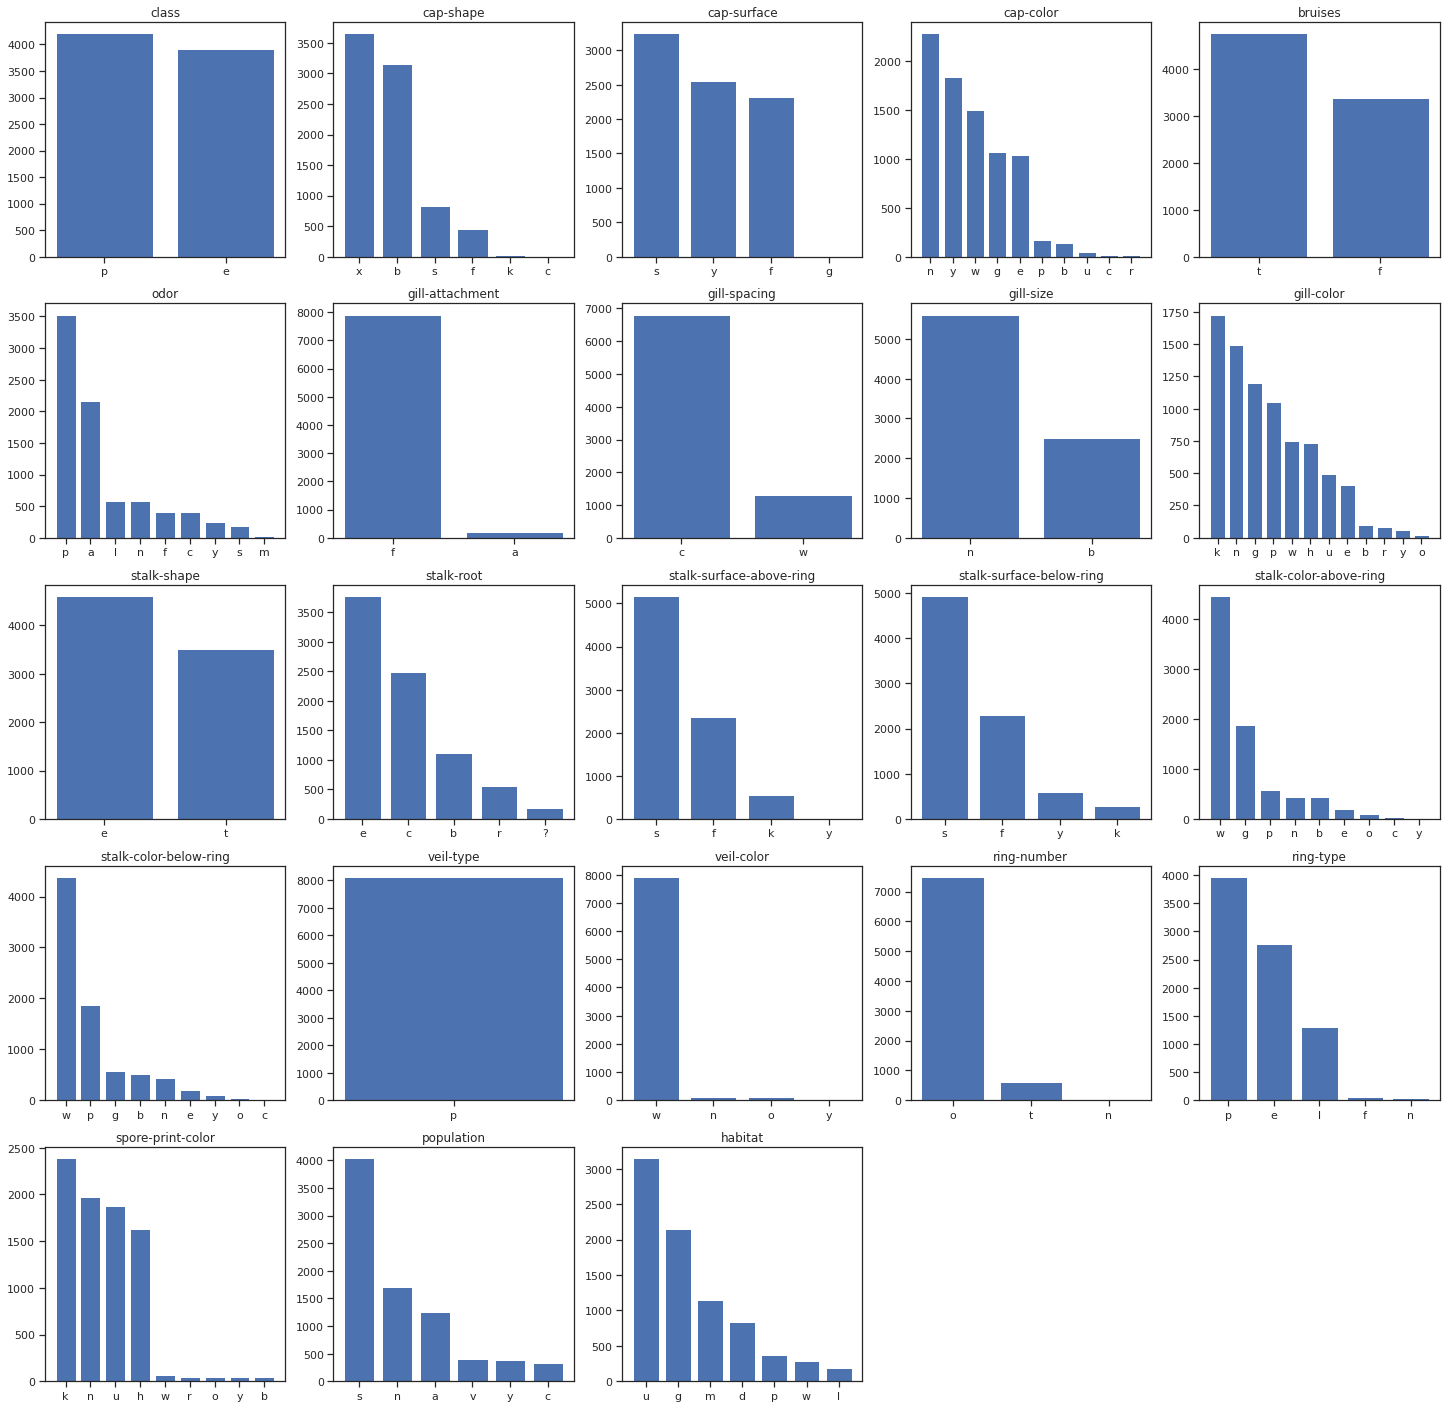

In [8]:
# Столбчатые диаграммы для каждого признака по категориям
fig = plt.figure(figsize=(25,25))
for i in range(mushrooms.shape[1]):
    axs = fig.add_subplot(5, 5,i+1)
    axs.bar(mushrooms.iloc[:,i].unique(),mushrooms.iloc[:,i].value_counts())
    axs.set_title(mushrooms.iloc[:,i].name)

Как видно из диаграмм, все признака представляют собой категориальные, преобразуем их в количественные различными методами.

# 3. Кодирование категориальных признаков и разделение переменных
Для кодирования входных признаков применим следующие методы:

1. one-hot encoding - каждый класс будет представлен отдельным признаком
2. ordinal encoding - будет применен искусственный порядок над классами, количество признаков не изменится

Целевой признак *класс гриба* преобразуем в бинарный с помощью средств pandas и numpy.

In [9]:
# Выделяем входные признаки
mushrooms_X = mushrooms.iloc[:, 1:].values
mushrooms_X

array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [10]:
#one-hot encoding для входных признаков
mushrooms_ohe_X = pd.get_dummies(mushrooms.drop('class',1))
mushrooms_ohe_X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# Количество всех классов входных признаков в датасете
mushrooms_ohe_X.astype(bool).sum(axis=0)

cap-shape_b     452
cap-shape_c       4
cap-shape_f    3152
cap-shape_k     828
cap-shape_s      32
               ... 
habitat_l       832
habitat_m       292
habitat_p      1144
habitat_u       368
habitat_w       192
Length: 117, dtype: int64

In [12]:
# импорт Ordinal encoding из библиотеки
from sklearn.preprocessing import OrdinalEncoder

In [13]:
# Ordinal encoding для входных признаков
oe = OrdinalEncoder(categories='auto')
mushrooms_oe_X = oe.fit_transform(mushrooms_X)
mushrooms_oe_X

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

In [14]:
# Выделяем целевой признак
mushrooms_y = mushrooms.iloc[:, 0].values
mushrooms_y

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [15]:
# Преобразуем целевой признак в бинарный
mushrooms_le_y = pd.Series(np.where(mushrooms_y == 'e', 1, 0),
          mushrooms.index).to_numpy()
mushrooms_le_y

array([0, 1, 1, ..., 1, 0, 1])

# 4. Построение моделей
Для построения различных моделей по заданию реализуем несколько ключевых функций, которые будут производить Grid Search, выводить значения метрик и генерировать графики для сравнения моделей

In [16]:
# Импортируем GridSearch для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning,FitFailedWarning
from termcolor import colored
# Функция подбора гиперпараметра и вывода информации о лучшей модели
def grid_search_print_stat(estimator,param_grid,X_train,y_train,cv=None,scoring=None):
    grid_search = GridSearchCV(estimator, param_grid, cv=cv, scoring=scoring)
    
    #fit_time = %timeit -n1 -r1 -o print(grid_search.fit(X_train, y_train))
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")
        fit_time = %timeit -n1 -r1 -o print(grid_search.fit(X_train, y_train))
        if len(w):
            converge_warning = colored('WARNING: there were {} Convergence Errors!'.format(len(w)), color='red')
            print(converge_warning)
    #%time print(grid_search.fit(X_train, y_train))
    display('Gris Search - результаты:')
    # Выводим результаты подбора
    print("Результаты подбора: ",grid_search.cv_results_)
    # Лучшая модель
    display('Лучшая из построенных моделей:')
    print("Лучшая модель: ",grid_search.best_estimator_)
    # Лучшее значение метрики
    print("Лучшее значение метрики: ",grid_search.best_score_)
    # Лучшее значение параметров
    print("Лучшее значение параметров: ",grid_search.best_params_)
    return grid_search.best_estimator_,fit_time.average,grid_search.best_score_

In [17]:
from sklearn.preprocessing import LabelEncoder
# Вывод значения метрики для обучающего и тестового набора
def print_metric_scores(metrics,y_train,y_test,predict_y_train,predict_y_test):
    #копируем массивы в локальные переменные, чтобы не изменять исходные
    y_train_copy = y_train
    y_test_copy = y_test
    predict_y_train_copy = predict_y_train
    predict_y_test_copy = predict_y_test
    metrics_scores = {}
    #если массивы строковые кодируем в числовой формат
    if isinstance(y_train[0], str):
        le = LabelEncoder()
        y_train_copy = le.fit_transform(y_train)
        y_test_copy = le.fit_transform(y_test_copy)
        predict_y_train_copy = le.fit_transform(predict_y_train_copy)
        predict_y_test_copy = le.fit_transform(predict_y_test_copy)
    for metric_name, metric in metrics.items():
        # Качество для обучающего набора
        train_score = metric(y_train_copy, predict_y_train_copy)
        print('метрика:', metric_name, '- обучающая выборка: ', train_score)
        metrics_scores[metric_name+'_train'] = train_score
        # Качество для тестового набора
        test_score = metric(y_test_copy, predict_y_test_copy)
        print('метрика:', metric_name, '- тестовая выборка: ', test_score)
        metrics_scores[metric_name+'_test'] = test_score
    return metrics_scores
        
# Обучение модели и вычисление целевого признака
def fit_predict(estimator, X_train, X_test, y_train):
    estimator.fit(X_train, y_train)
    target_train = estimator.predict(X_train)
    target_test = estimator.predict(X_test)
    return target_train,target_test
# Рассчет метрик для модели
def print_model_metrics(estimator, X_train, X_test, y_train, y_test, metrics):
    target_train,target_test = fit_predict(estimator,X_train,X_test,y_train)
    metrics_scores = print_metric_scores(metrics,y_train,y_test,target_train,target_test)
    return target_train,target_test,metrics_scores

In [18]:
from sklearn.metrics import accuracy_score, precision_score
from typing import Dict
# Вывод метрики accuracy для каждого класса
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    display('Accuracy для каждого класса:')
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [19]:
# Импорт функци разделения выборки
from sklearn.model_selection import train_test_split
# Функция для построения модели и вывода статистики
def build_print_model(mushrooms_X,mushrooms_y,estimator,param_grid,model_name,build_required=True):
    # Разделение выборки на обучающую и тестовую
    mushrooms_X_train, mushrooms_X_test, mushrooms_y_train, mushrooms_y_test = train_test_split(mushrooms_X, mushrooms_y,
                                                                                                test_size=0.7, random_state=42)
    if build_required:
        # grid search и статистика по нему
        best_estimator,fit_time,best_score = grid_search_print_stat(estimator,param_grid, mushrooms_X_train,
                                                                mushrooms_y_train,cv=5, scoring='accuracy')
    else:
        best_estimator = estimator
        fit_time=best_score=0
    class_metrics = {'accuracy':accuracy_score,'precision':precision_score}
    
    display('Значения метрик качества:')
    # Оценки качества по заданным метрикам
    pred_mushrooms_y_train, pred_mushrooms_y_test,scores = print_model_metrics(best_estimator,mushrooms_X_train,mushrooms_X_test,
                                                                    mushrooms_y_train,mushrooms_y_test,class_metrics)
    # accuracy по классам
    print_accuracy_score_for_classes(mushrooms_y_test, pred_mushrooms_y_test)
    
    # Словарь характеристик модели
    lr_oe_stats = {'model_name': model_name,'fit_time':fit_time,"best_score":best_score}
    lr_oe_stats.update(scores)
    return lr_oe_stats, best_estimator

In [20]:
#Функция соединения словарей в один, значения каждого ключа в виде листов
def dict_zip(*dicts):
    return {k: [d[k] for d in dicts] for k in dicts[0].keys()}

In [21]:
# Вывод графиков для сравнения моделей
def print_models_plots(*stats,plot_time=True):
    zip_model_data = dict_zip(*stats)
    df = pd.DataFrame(zip_model_data,index=zip_model_data['model_name'])
    display(df)
    display(df.transpose().iloc[2:,:].plot(kind='bar',title='Значения метрик для моделей',figsize=(10,10)))
    if plot_time:
        display(df.transpose().iloc[1:2,:].plot(kind='bar', title='Время обучения моделей (в секундах)',figsize=(10,10)))

Далее реализуем модели и сравним их качество.

# 4.1 Линейная модель - Logistic Regression
В качестве линейной модели возьмем **Logistic Regression**, который предназначен для бинарной классификации.

Сравним качество модели при входных признаках, закодированных методом **one-hot encoding** и **ordinal encoding**.
Ожидаем, что качество при **ordinal encoding** будет ниже, так как для каждого признака задается порядок классов, несвойственный ему изначально.

In [22]:
# импорт модели из библиотеки
from sklearn.linear_model import LogisticRegression

In [23]:
# Гиперпараметры для решетчатого поиска
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [24]:
# Строим модели при ordinal encoding X признаках и выводим статистику
lr_oe_stats, lr_oe_estimator = build_print_model(mushrooms_oe_X,mushrooms_le_y,LogisticRegression(),lr_param_grid,'LogisticRegression_oe')
lr_oe_stats

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
1.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


'Gris Search - результаты:'

Результаты подбора:  {'mean_fit_time': array([0.01862149, 0.03095498, 0.04901881, 0.04894814, 0.0494153 ,
       0.04939575, 0.04825692]), 'std_fit_time': array([0.00371723, 0.00083133, 0.00192619, 0.0009164 , 0.00185452,
       0.00060689, 0.0007287 ]), 'mean_score_time': array([0.00052633, 0.00052857, 0.00053658, 0.00052586, 0.00055356,
       0.00053549, 0.00052443]), 'std_score_time': array([2.67847543e-05, 2.03688180e-05, 3.11672819e-05, 1.97704069e-05,
       2.12358024e-05, 1.35685101e-05, 2.04593705e-05]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.8954918 , 0.8954918 , 0.92418033, 0.94877049, 0.95491803,
       0.96311475, 0.96311475]), 'split1_test_score': array([0.85040984, 0.8647541 , 0.92418033, 0.94672131, 

'Лучшая из построенных моделей:'

Лучшая модель:  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Лучшее значение метрики:  0.9700499882182652
Лучшее значение параметров:  {'C': 100}


'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  0.9716864997948297
метрика: accuracy - тестовая выборка:  0.9737998944962194
метрика: precision - обучающая выборка:  0.9724349157733537
метрика: precision - тестовая выборка:  0.9748449345279118


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


'Accuracy для каждого класса:'

Метка 	 Accuracy
0 	 0.9737598849748382
1 	 0.9738382099827882


{'model_name': 'LogisticRegression_oe',
 'fit_time': 1.5813907099945936,
 'best_score': 0.9700499882182652,
 'accuracy_train': 0.9716864997948297,
 'accuracy_test': 0.9737998944962194,
 'precision_train': 0.9724349157733537,
 'precision_test': 0.9748449345279118}

In [25]:
# Строим модели при one-hot encoding X признаках и выводим статистику
lr_ohe_stats, lr_ohe_estimator = build_print_model(mushrooms_ohe_X,mushrooms_le_y,LogisticRegression(),lr_param_grid,'LogisticRegression_ohe')
lr_ohe_stats

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
1.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


'Gris Search - результаты:'

Результаты подбора:  {'mean_fit_time': array([0.01354785, 0.01728959, 0.02445884, 0.03780622, 0.05323792,
       0.04979668, 0.0483933 ]), 'std_fit_time': array([0.00212022, 0.00195005, 0.00127187, 0.00344192, 0.00288245,
       0.00709886, 0.00673512]), 'mean_score_time': array([0.00151258, 0.0015265 , 0.00153308, 0.00155993, 0.00154018,
       0.00155802, 0.00158277]), 'std_score_time': array([5.57753552e-05, 3.76304587e-05, 2.82750363e-05, 6.77534091e-05,
       3.02699593e-05, 3.83062020e-05, 2.78729980e-05]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.90778689, 0.9692623 , 0.98770492, 0.99590164, 0.99590164,
       0.99590164, 0.99590164]), 'split1_test_score': array([0.9057377 , 0.97540984, 0.99590164, 1.        , 

'Лучшая из построенных моделей:'

Лучшая модель:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Лучшее значение метрики:  0.9983589726327129
Лучшее значение параметров:  {'C': 10}


'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  1.0
метрика: accuracy - тестовая выборка:  1.0
метрика: precision - обучающая выборка:  1.0
метрика: precision - тестовая выборка:  1.0


'Accuracy для каждого класса:'

Метка 	 Accuracy
0 	 1.0
1 	 1.0


{'model_name': 'LogisticRegression_ohe',
 'fit_time': 1.3585897900047712,
 'best_score': 0.9983589726327129,
 'accuracy_train': 1.0,
 'accuracy_test': 1.0,
 'precision_train': 1.0,
 'precision_test': 1.0}

,model_name,fit_time,best_score,accuracy_train,accuracy_test,precision_train,precision_test
LogisticRegression_oe,LogisticRegression_oe,1.581391,0.970050,0.971686,0.9738,0.972435,0.974845
LogisticRegression_ohe,LogisticRegression_ohe,1.358590,0.998359,1.000000,1.0000,1.000000,1.000000


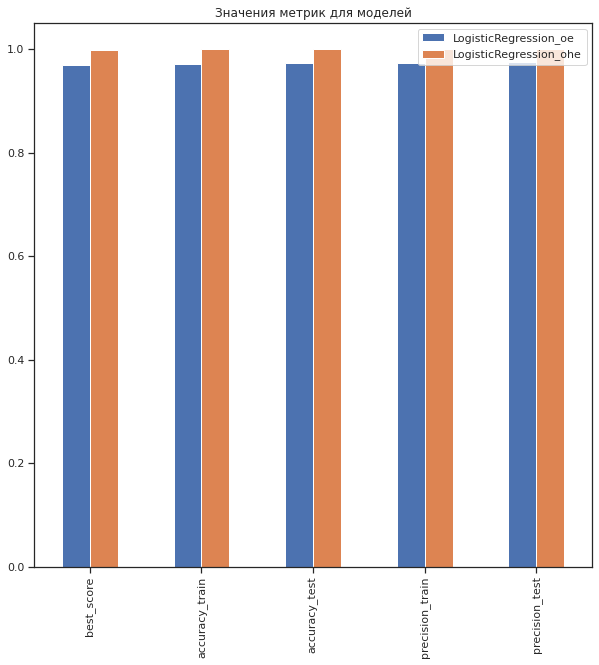

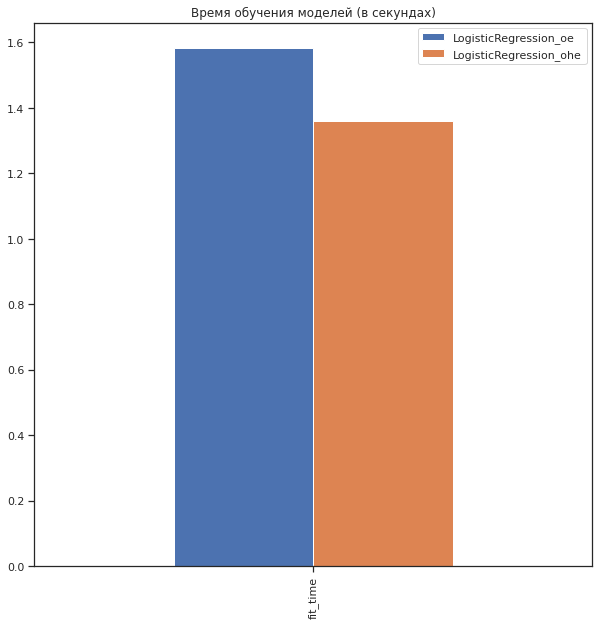

In [26]:
# Сравним качество и время обучения моделей
print_models_plots(lr_oe_stats,lr_ohe_stats)

Как следует из таблицы значений метрик и диаграмм сравнения качество модели, использующей **one-hot encoding** выше. Более того, время обучения это модели меньше и количество ошибок сходимости при подборе гиперпараметров существенно меньше.

Обе модели обладают хорошим качеством, **one-hot encoding** модель имеет максимальные оценки по всем метрикам.
Для дальнейшего сравнения будем использовать **one-hot encoding** модель. 

# 4.2 SVM модель - SVC
В качестве SVM модели возьмем **SVC**, который предназначен для решения задачи классификации на небольших датасетах.

Сравним качество модели при входных признаках, закодированных методом **one-hot encoding** и **ordinal encoding**.
Ожидаем, что качество при **ordinal encoding** будет ниже, так как для каждого признака задается порядок классов, несвойственный ему изначально.

In [27]:
# Импорт модуля SVM, в котором находятся соответсвующие модели
from sklearn import svm

In [28]:
# Гиперпараметры для решетчатого поиска
svc_param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [29]:
# Строим модели при ordinal encoding X признаках и выводим статистику
svc_oe_stats,svc_oe_estimator = build_print_model(mushrooms_oe_X,mushrooms_le_y,svm.SVC(),svc_param_grid,'SVM_oe')
svc_oe_stats

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
5min 55s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


'Gris Search - результаты:'

Результаты подбора:  {'mean_fit_time': array([1.30179119e-01, 1.81896114e-01, 8.31214905e-02, 1.30365705e-01,
       6.05395794e-02, 1.04056978e-01, 7.68765450e-02, 9.62623119e-02,
       2.77184391e-01, 9.29680109e-01, 5.31313076e+00, 6.35596449e+01]), 'std_fit_time': array([1.36871136e-02, 7.43805792e-03, 1.26151407e-03, 2.95059270e-03,
       1.68407806e-03, 4.59113981e-03, 7.17708334e-03, 8.79034546e-04,
       1.13893342e-01, 2.26463160e-01, 1.44057187e+00, 2.59785056e+01]), 'mean_score_time': array([0.02117553, 0.03365288, 0.01283989, 0.02213511, 0.0068603 ,
       0.01439409, 0.00388594, 0.0085093 , 0.00558805, 0.00604682,
       0.0030086 , 0.00280809]), 'std_score_time': array([0.00030133, 0.00041998, 0.0001289 , 0.00075196, 0.00016722,
       0.00035136, 0.00060724, 0.00017821, 0.00048905, 0.00158967,
       0.00070143, 0.00059443]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False

'Лучшая из построенных моделей:'

Лучшая модель:  SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Лучшее значение метрики:  0.997948295014643
Лучшее значение параметров:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  1.0
метрика: accuracy - тестовая выборка:  1.0
метрика: precision - обучающая выборка:  1.0
метрика: precision - тестовая выборка:  1.0


'Accuracy для каждого класса:'

Метка 	 Accuracy
0 	 1.0
1 	 1.0


{'model_name': 'SVM_oe',
 'fit_time': 355.5740341799974,
 'best_score': 0.997948295014643,
 'accuracy_train': 1.0,
 'accuracy_test': 1.0,
 'precision_train': 1.0,
 'precision_test': 1.0}

In [30]:
# Строим модели при one-hot encoding X признаках и выводим статистику
svc_ohe_stats,svc_ohe_estimator = build_print_model(mushrooms_ohe_X,mushrooms_le_y,svm.SVC(),svc_param_grid,'SVM_ohe')
svc_ohe_stats

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
13.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


'Gris Search - результаты:'

Результаты подбора:  {'mean_fit_time': array([0.34902649, 0.77177091, 0.15100389, 0.34438653, 0.08197412,
       0.16329575, 0.0918396 , 0.08544512, 0.06097479, 0.06129465,
       0.06081982, 0.06119184]), 'std_fit_time': array([0.0030224 , 0.00352002, 0.00280675, 0.00272901, 0.00281183,
       0.0206916 , 0.01112336, 0.00765398, 0.00493323, 0.00491406,
       0.00494545, 0.00502796]), 'mean_score_time': array([0.07267299, 0.17431221, 0.02951274, 0.07110696, 0.01167469,
       0.030899  , 0.01088815, 0.01191077, 0.00741963, 0.00743308,
       0.00742497, 0.00747085]), 'std_score_time': array([0.00213996, 0.00042534, 0.00059142, 0.00081145, 0.00067032,
       0.00220435, 0.00184155, 0.00073754, 0.00076637, 0.00077025,
       0.00076271, 0.00079643]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
         

'Лучшая из построенных моделей:'

Лучшая модель:  SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Лучшее значение метрики:  0.9983589726327129
Лучшее значение параметров:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  1.0
метрика: accuracy - тестовая выборка:  1.0
метрика: precision - обучающая выборка:  1.0
метрика: precision - тестовая выборка:  1.0


'Accuracy для каждого класса:'

Метка 	 Accuracy
0 	 1.0
1 	 1.0


{'model_name': 'SVM_ohe',
 'fit_time': 13.787907994999841,
 'best_score': 0.9983589726327129,
 'accuracy_train': 1.0,
 'accuracy_test': 1.0,
 'precision_train': 1.0,
 'precision_test': 1.0}

,model_name,fit_time,best_score,accuracy_train,accuracy_test,precision_train,precision_test
SVM_oe,SVM_oe,355.574034,0.997948,1.0,1.0,1.0,1.0
SVM_ohe,SVM_ohe,13.787908,0.998359,1.0,1.0,1.0,1.0


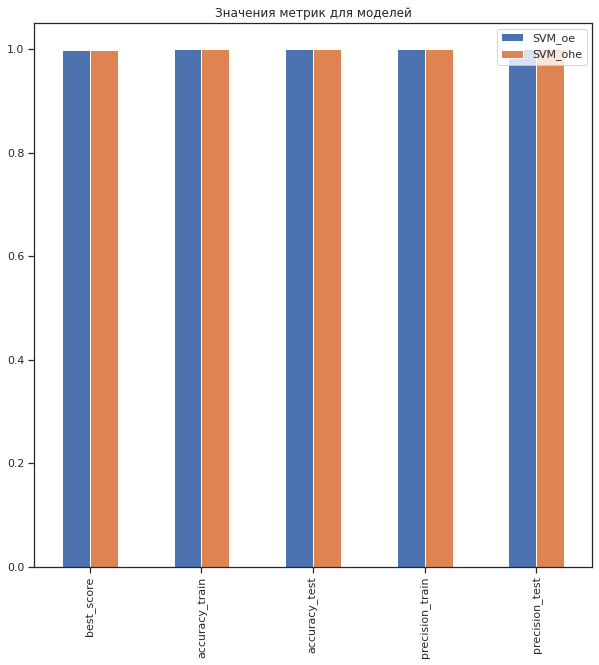

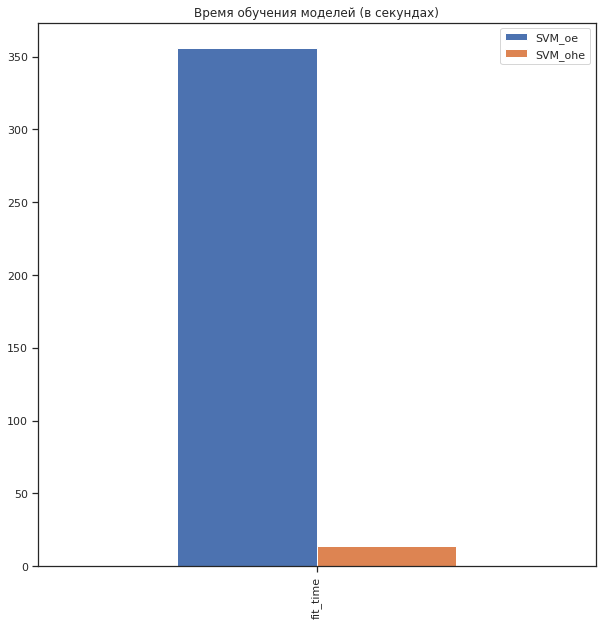

In [31]:
# Сравним качество и время обучения моделей
print_models_plots(svc_oe_stats,svc_ohe_stats)

Как следует из таблицы значений метрик и диаграмм сравнения качество обе модели имеют приблизительно одинаковое качество. Однако, время обучения **ordinal encoding** модели в несколько десятков раз больше и является слишком большим для выборки такого порядка.

Поэтому для дальнейшего сравнения будем использовать **one-hot encoding** модель. 

# 4.3 Дерево решений - Decision Tree Classifier
В качестве дерева решений возьмем **DecisionTreeClassifier**, который решает как задачу многоклассовой классификации, так и бинарной.

Особенность данной модели является возмножность вывода наиболее значимых признаков при построении дерева. Сравним качество модели, обученной на раличном количесвте наиболее важных признаков (1, 3, 5, все).

In [78]:
# импорт модели из библиотеки
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Гиперпараметры для решетчатого поиска
dtc_param_grid = {
    'max_depth': [4, 5, 6, 7],
    'min_samples_leaf': [1,5,10,20],
    'max_features': ['log2', 'sqrt', 0.5, 0.75,None]
}

In [80]:
# Обучим дерево на всех признаках
dtc_f_stats,dtc_f_estimator = build_print_model(mushrooms_ohe_X,mushrooms_y,DecisionTreeClassifier(random_state=42),dtc_param_grid,'DTC_full')
dtc_f_stats

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'ma

'Gris Search - результаты:'

Результаты подбора:  {'mean_fit_time': array([0.00705314, 0.0068079 , 0.00656872, 0.00663586, 0.00693741,
       0.00680132, 0.00692921, 0.0068933 , 0.00900688, 0.00914474,
       0.00920625, 0.00901895, 0.01040602, 0.01046333, 0.01030226,
       0.01055193, 0.0122858 , 0.0120492 , 0.01234097, 0.01243243,
       0.0068449 , 0.00672984, 0.00696263, 0.00693564, 0.00711527,
       0.00726275, 0.00722346, 0.00743241, 0.00968976, 0.0093173 ,
       0.00931158, 0.00945535, 0.01100059, 0.01080074, 0.01094704,
       0.01073489, 0.0132679 , 0.01343842, 0.01275511, 0.01284833,
       0.00703645, 0.00693555, 0.00699205, 0.00697289, 0.00713878,
       0.00711703, 0.007199  , 0.00729032, 0.00995479, 0.00986481,
       0.00962753, 0.00920606, 0.01161551, 0.01238084, 0.01112695,
       0.01109915, 0.01499705, 0.01730132, 0.01335225, 0.0134378 ,
       0.00725584, 0.00718265, 0.00703378, 0.00685816, 0.00740309,
       0.00740356, 0.00740523, 0.00737529, 0.00991392, 0.00981369,
       0.00955777, 0.00

'Лучшая из построенных моделей:'

Лучшая модель:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Лучшее значение метрики:  1.0
Лучшее значение параметров:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 1}


'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  1.0
метрика: accuracy - тестовая выборка:  1.0
метрика: precision - обучающая выборка:  1.0
метрика: precision - тестовая выборка:  1.0


'Accuracy для каждого класса:'

Метка 	 Accuracy
e 	 1.0
p 	 1.0


{'model_name': 'DTC_full',
 'fit_time': 5.193798191001406,
 'best_score': 1.0,
 'accuracy_train': 1.0,
 'accuracy_test': 1.0,
 'precision_train': 1.0,
 'precision_test': 1.0}

In [81]:
# Импорт библиотек и функций для визуализации дерева
from sklearn.tree import export_graphviz
import graphviz
import pydot

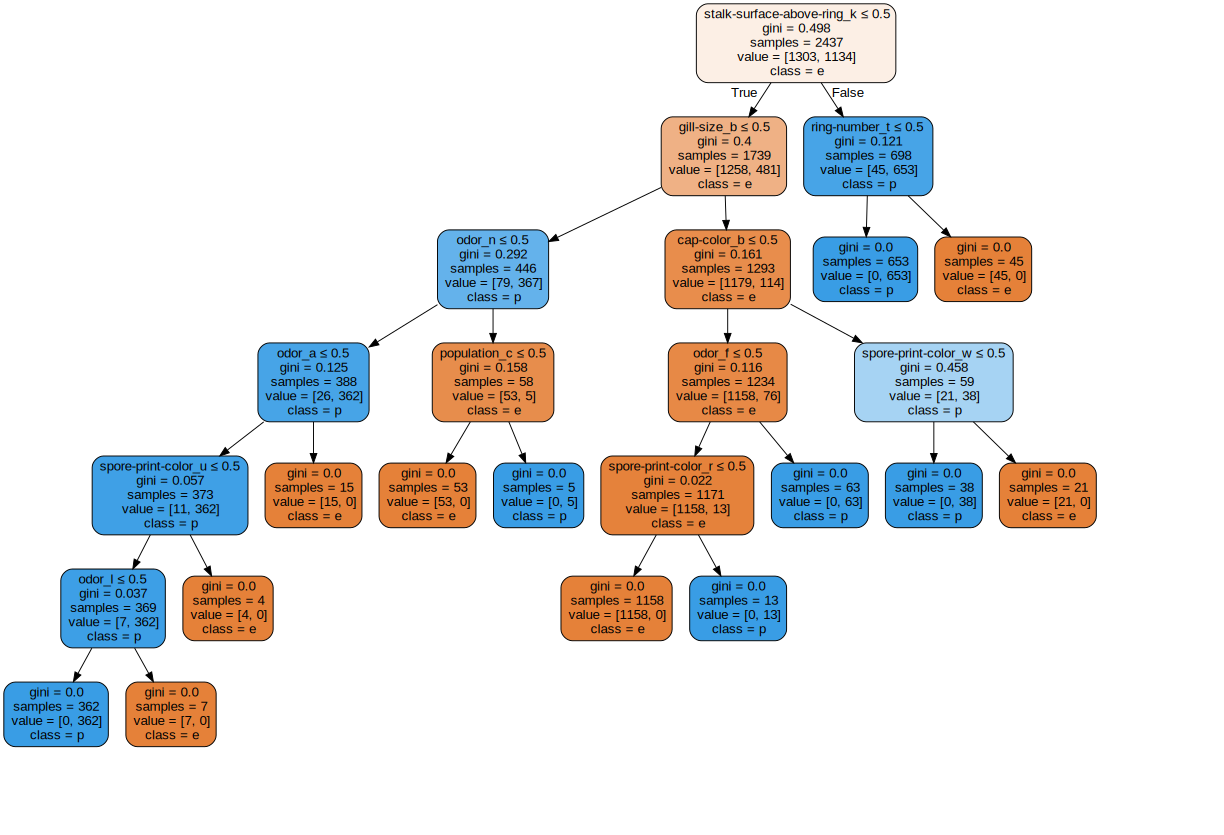

In [82]:
# Визуализации дерева решений подобранной модели
dot_data = export_graphviz(dtc_f_estimator, out_file=None, 
                           feature_names=mushrooms_ohe_X.columns.values.tolist(), 
                           class_names=np.unique(mushrooms_y).tolist(), 
                           filled=True, rounded=True, special_characters=True)
pdot = pydot.graph_from_dot_data(dot_data)
# Access element [0] because graph_from_dot_data actually returns a list of DOT elements.
pdot[0].set_size('"17,17!"')
graph = graphviz.Source(pdot[0].to_string())  
graph

Как видно из построенного дерева, используется лишь часть входных признаков. Все проверки являются булевыми, так как входные признаки закодированы методом **one-hot encoding**.

In [83]:
# Важность признаков в построенной модели
list(zip(mushrooms_ohe_X.columns.values.tolist(), dtc_f_estimator.feature_importances_))

[('cap-shape_b', 0.0),
 ('cap-shape_c', 0.0),
 ('cap-shape_f', 0.0),
 ('cap-shape_k', 0.0),
 ('cap-shape_s', 0.0),
 ('cap-shape_x', 0.0),
 ('cap-surface_f', 0.0),
 ('cap-surface_g', 0.0),
 ('cap-surface_s', 0.0),
 ('cap-surface_y', 0.0),
 ('cap-color_b', 0.03150851571286286),
 ('cap-color_c', 0.0),
 ('cap-color_e', 0.0),
 ('cap-color_g', 0.0),
 ('cap-color_n', 0.0),
 ('cap-color_p', 0.0),
 ('cap-color_r', 0.0),
 ('cap-color_u', 0.0),
 ('cap-color_w', 0.0),
 ('cap-color_y', 0.0),
 ('bruises_f', 0.0),
 ('bruises_t', 0.0),
 ('odor_a', 0.02240092240216966),
 ('odor_c', 0.0),
 ('odor_f', 0.0964236733645542),
 ('odor_l', 0.011326045534504774),
 ('odor_m', 0.0),
 ('odor_n', 0.059671501952257205),
 ('odor_p', 0.0),
 ('odor_s', 0.0),
 ('odor_y', 0.0),
 ('gill-attachment_a', 0.0),
 ('gill-attachment_f', 0.0),
 ('gill-spacing_c', 0.0),
 ('gill-spacing_w', 0.0),
 ('gill-size_b', 0.2952265223837091),
 ('gill-size_n', 0.0),
 ('gill-color_b', 0.0),
 ('gill-color_e', 0.0),
 ('gill-color_g', 0.0),
 ('g

In [84]:
# Важность признаков в сумме дает единицу
round(sum(dtc_f_estimator.feature_importances_),6)

1.0

In [85]:
# Функции для сортировки списка признаков и вывода диаграммы
from operator import itemgetter


def sort_feature_importances(tree_model,X_dataset,no_zero=False):
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    if no_zero:
        zero_ind = next((i for i, x in enumerate(data) if x==0), None)
        labels = labels[:zero_ind-1]
        data = data[:zero_ind-1]
    return labels, data

def draw_feature_importances(tree_model, X_dataset, figsize=(15,7),no_zero=False):
    """
    Вывод важности признаков в виде графика
    """
    labels, data = sort_feature_importances(tree_model, X_dataset,no_zero)
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

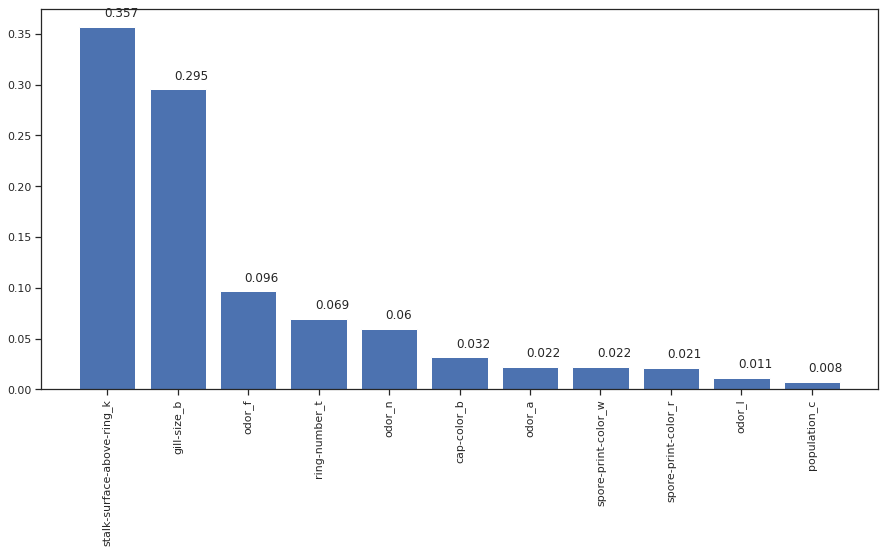

In [86]:
# Сортировка признаков по важности и вывод столбчатой диаграммы
dtc_if_labels_sorted, dtc_if_data_sorted = sort_feature_importances(dtc_f_estimator, mushrooms_ohe_X)
draw_feature_importances(dtc_f_estimator, mushrooms_ohe_X,no_zero=True);

Как видно из диаграммы, нет одного превалирующего признака. Однако, первые 5 признаков составляют больше 0.8 важности. Проверим качество модели для разного числа важных признаков, вплоть до 5. 

In [87]:
# Пересортируем признаки на основе важности
mushrooms_ohe_X_sorted = mushrooms_ohe_X[dtc_if_labels_sorted]
mushrooms_ohe_X_sorted.head()

,stalk-surface-above-ring_k,gill-size_b,odor_f,ring-number_t,odor_n,cap-color_b,odor_a,spore-print-color_w,spore-print-color_r,odor_l,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [88]:
# Обучим дерево на 1 самом важном признаке
dtc_i1_stats = build_print_model(mushrooms_ohe_X_sorted.iloc[:,:1],mushrooms_y,dtc_f_estimator,dtc_param_grid,'DTC_i1',build_required=False)[0]
dtc_i1_stats

'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  0.784160853508412
метрика: accuracy - тестовая выборка:  0.7703534376648496
метрика: precision - обучающая выборка:  0.9355300859598854
метрика: precision - тестовая выборка:  0.9408602150537635


'Accuracy для каждого класса:'

Метка 	 Accuracy
e 	 0.96592082616179
p 	 0.5661394680086269


{'model_name': 'DTC_i1',
 'fit_time': 0,
 'best_score': 0,
 'accuracy_train': 0.784160853508412,
 'accuracy_test': 0.7703534376648496,
 'precision_train': 0.9355300859598854,
 'precision_test': 0.9408602150537635}

In [89]:
# Обучим дерево на 3 самых важных признаках
dtc_i3_stats = build_print_model(mushrooms_ohe_X_sorted.iloc[:,:3],mushrooms_y,dtc_f_estimator,dtc_param_grid,'DTC_i3',build_required=False)[0]
dtc_i3_stats

'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  0.9540418547394337
метрика: accuracy - тестовая выборка:  0.9500615438719887
метрика: precision - обучающая выборка:  0.9330508474576271
метрика: precision - тестовая выборка:  0.928326474622771


'Accuracy для каждого класса:'

Метка 	 Accuracy
e 	 0.9280550774526678
p 	 0.9730409777138749


{'model_name': 'DTC_i3',
 'fit_time': 0,
 'best_score': 0,
 'accuracy_train': 0.9540418547394337,
 'accuracy_test': 0.9500615438719887,
 'precision_train': 0.9330508474576271,
 'precision_test': 0.928326474622771}

In [90]:
# Обучим дерево на 5 самых важных признаках
dtc_i5_stats = build_print_model(mushrooms_ohe_X_sorted.iloc[:,:5],mushrooms_y,dtc_f_estimator,dtc_param_grid,'DTC_i5',build_required=False)[0]
dtc_i5_stats

'Значения метрик качества:'

метрика: accuracy - обучающая выборка:  0.979072630283135
метрика: accuracy - тестовая выборка:  0.9766133286442764
метрика: precision - обучающая выборка:  0.9770925110132158
метрика: precision - тестовая выборка:  0.9749013983506634


'Accuracy для каждого класса:'

Метка 	 Accuracy
e 	 0.9759036144578314
p 	 0.9773544212796549


{'model_name': 'DTC_i5',
 'fit_time': 0,
 'best_score': 0,
 'accuracy_train': 0.979072630283135,
 'accuracy_test': 0.9766133286442764,
 'precision_train': 0.9770925110132158,
 'precision_test': 0.9749013983506634}

,model_name,fit_time,best_score,accuracy_train,accuracy_test,precision_train,precision_test
DTC_full,DTC_full,5.193798,1.0,1.000000,1.000000,1.000000,1.000000
DTC_i1,DTC_i1,0.000000,0.0,0.784161,0.770353,0.935530,0.940860
DTC_i3,DTC_i3,0.000000,0.0,0.954042,0.950062,0.933051,0.928326
DTC_i5,DTC_i5,0.000000,0.0,0.979073,0.976613,0.977093,0.974901


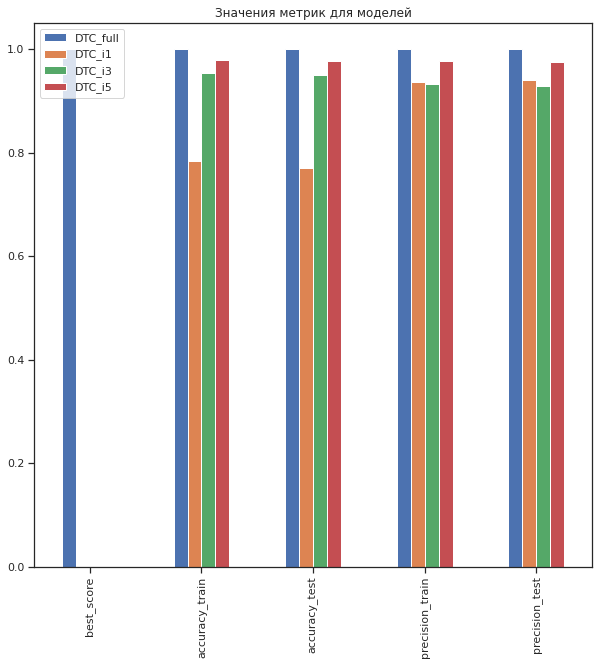

In [91]:
# Сравним качество полученных моделей
print_models_plots(dtc_f_stats,dtc_i1_stats,dtc_i3_stats,dtc_i5_stats,plot_time=False)

Как видно из таблицы и диаграммы, при использовании только 5 наиболее важных признаков достигается качество модели, близкое к исходной. При 3 признаках, качество незначительно падает, а при использовании только одного сильно упало значении метрики accuracy, а показатели precision снизились незначительно. Это свидетельствует о том, что классификатор определил достоточно много съедобных грибов как несъедобные.

# 5. Сравнение качества 3 моделей
Наконец, сравним качество и время обучения моделей всех типов: **LogisticRegression**, **SVC**, **DecisionTreeClassifier**.

,model_name,fit_time,best_score,accuracy_train,accuracy_test,precision_train,precision_test
LogisticRegression_ohe,LogisticRegression_ohe,1.358590,0.998359,1.0,1.0,1.0,1.0
SVM_ohe,SVM_ohe,13.787908,0.998359,1.0,1.0,1.0,1.0
DTC_full,DTC_full,5.193798,1.000000,1.0,1.0,1.0,1.0


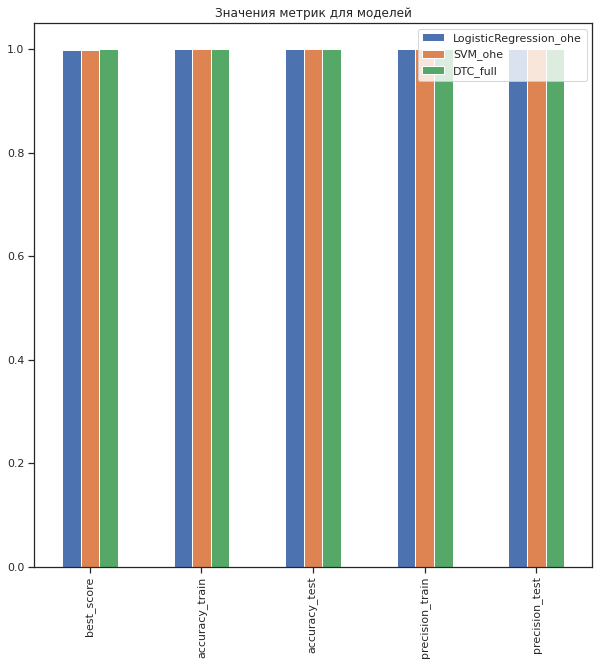

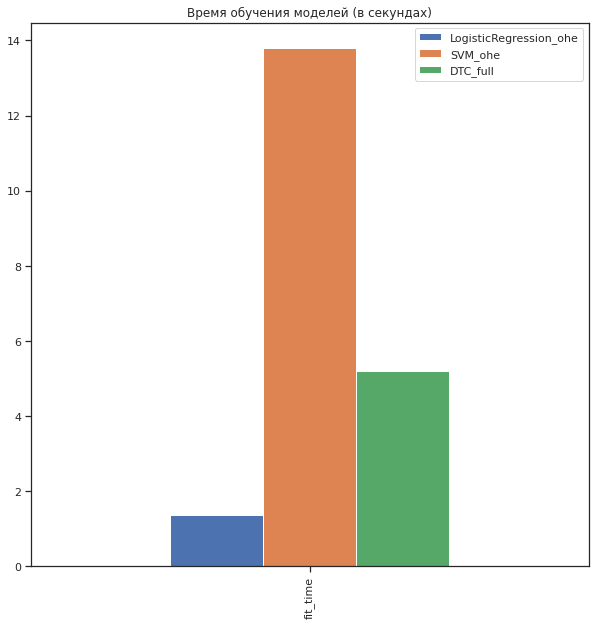

In [92]:
# Выводим статистику моделей 3 типов
print_models_plots(lr_ohe_stats,svc_ohe_stats,dtc_f_stats)

Исходя из данных таблицы и диаграмм, все модели обладают хорошим качеством. **DecisionTreeClassifier** выступает в качестве "золотой середины" по времени подбору параметров. При этом только у этой модели значение *grid_search.best_score_* равно 1.

# 6. Выводы
Таким образом, в ходе лабораторной работы были изучены три типа моделей для решения задачи классификации: **LogisticRegression**, **SVC**, **DecisionTreeClassifier**. Проведен анализ моделей в отдельности и сравнение качества между собой. Были реализованы наглядные диаграммы, содержащие оценки моделей, а также визуализировано дерево решений.